In [1]:
%config InteractiveShell.ast_node_interactivity = 'all'

# 24SEA API

  **10-minute metric signals** that are collected by the 24SEA SHM system. The 10-minute metric signals (from now on addressed as metrics) are the cleaned and aggregated data calculated on a 10-minute basis. The metrics are calculated from the high-frequency raw data collected by the 24SEA SHM system. 24SEA does not provide direct access to the raw data as it needs to be processed and aggregated to be useful.

*We chose 10 minutes as the aggregation period because it has become an industry standard for SHM systems, since it is a good balance between the need for high temporal resolution and the need for a manageable amount of data.*

Users can verify which metrics they can access by inspecting their Datasignals App UI at https://api.24sea.eu/datasignals.

API documentation at https://api.24sea.eu/docs/v1#section/Introduction.


In [2]:

# **Package Imports**
# - From the Python Standard Library
import logging
import os
import sys

# - From third party libraries
import api_24sea
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import dotenv
import pandas as pd
import seaborn as sns


In [3]:
# - Some plot settings
plt.rcParams["figure.figsize"] = (10.5 / 2.514 / 0.7, 7.5 / 2.514 / 0.7)
plt.rcParams["font.family"] = "monospace"
plt.rcParams["font.size"] = 9
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.color"] = "#DDDDDD"
plt.rcParams["grid.linestyle"] = "-"
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["lines.markersize"] = 3
plt.rcParams["xtick.bottom"] = False
plt.rcParams["xtick.labelbottom"] = True
plt.rcParams["ytick.left"] = False
plt.rcParams["ytick.labelleft"] = True
plt.rcParams["figure.facecolor"] = "none"
plt.rcParams["axes.facecolor"] = "none"
plt.rcParams["figure.facecolor"] = "none"
plt.rcParams["axes.facecolor"] = "none"
plt.rcParams["savefig.facecolor"] = "none"
plt.rcParams["axes.labelcolor"] = "#333333"
plt.rcParams["lines.linewidth"] = 0.5
plt.rcParams["lines.markeredgewidth"] = 0.5
plt.rcParams["lines.markersize"] = 2
plt.rcParams["axes.prop_cycle"] = plt.cycler(
    color=["lightseagreen", "orchid", "gold", "orangered", "royalblue",
           "slategrey", "teal", "darkkhaki", "lightcoral", "yellowgreen"]
)


In [4]:
# **Package Versions**
print(f"📂 \033[1m\033[93mWorking Folder:     \033[0;34;4m{os.getcwd()}\033[0m")
print(f"🐼 \033[1m\033[93mPandas Version:     \033[0;3m{pd.__version__}\033[0m")
print(f"🌊 \033[1m\033[93mApi-24SEA Version:  \033[0;3m{api_24sea.__version__}\033[0m")
print(f"🐍 \033[1m\033[93mPython Version:     \033[0;3m{sys.version}\033[0m")
# **Notebook Configuration**
logger = logging.getLogger()
logger.setLevel(logging.INFO)


📂 Working Folder:     /home/pietro.dantuono@24SEA.local/Projects/Willow/api-24sea-binder-tutorial/notebooks
🐼 Pandas Version:     2.2.3
🌊 Api-24SEA Version:  1.4.19
🐍 Python Version:     3.10.12 (main, Jan 17 2025, 14:35:34) [GCC 11.4.0]


## Setting up the authentication credentials

The API requires *basic-auth*, meaning that credentials, namely `(username, password)`, must be provided to get data.

In a local Jupyter Notebook, credentials could be for example stored in a file called `variables.env` in the same path as the notebook, containing the following information:

```shell
API_24SEA_USERNAME=your_username
API_24SEA_PASSWORD=your_password
```

The variables could then be loaded using `python-dotenv` as follows:

```python
_ = dotenv.load_dotenv("variables.env")
if _:
    print("\033[32mEnvironment Variables Loaded Successfully\033[0m\n")
    username = os.getenv("API_24SEA_USERNAME")
    password = os.getenv("API_24SEA_PASSWORD")
    print(f"\033[1mAPI_24SEA_USERNAME: \033[35m{username}\033[0m")
    print(f"\033[1mAPI_24SEA_PASSWORD: \033[35m{password}\033[0;31m (do not show this one in a production setup!)\033[0;31m")
else:
    raise Exception("\033[1;31mEnvironment Variables Not Loaded. Please check the .env file.\033[0m")
```


In [5]:
# **Load Environment Variables from environment File**
_ = dotenv.load_dotenv("variables.env")
if _:
    print("Environment Variables Loaded Successfully")
    print(os.getenv("API_24SEA_USERNAME"))
    # print(os.getenv("24SEA_API_PASSWORD"))
else:
    raise Exception("Environment Variables Not Loaded")


Environment Variables Loaded Successfully
24sea.admin


## Initializing an empty dataframe

Initializing an empty dataframe is necessary to use the API, as here is where the data will be stored.


In [7]:
# **DataFrame initialization**
# The empty DataFrame is created beforehand because it needs to authenticate
# with the API to fetch the data.
df = pd.DataFrame()

## Authenticating with the API

The authentication step allows you to access the API and check the available metrics. If the username and password environment variables are named `API_24SEA_USERNAME` and `API_24SEA_PASSWORD`, respectively, the `datasignals`-enabled dataframe tries to authenticate automatically. If the authentication is successful, you can proceed to the next steps. Otherwise, you should probably check the credentials and try again, perhaps by authenticating manually, as shown below:

```python
# **Authentication**
df.datasignals.authenticate(username, password)
```
 

In [8]:
# **Metrics Overview**
# The metrics overview is a summary of the metrics available in the API.
df.datasignals._DataSignals__api.metrics_overview


24sea.admin has access to https://api.24sea.eu/.
Now getting your metrics_overview table...


,CRUD_privileges,data_group,description,end_timestamp,location,metric,print_str,short_hand,site,start_timestamp,statistic,unit_str,site_id,location_id
0,None,acceleration,max of Accelerations measured using AO1_A01_NA...,3000-01-01T00:00:00Z,AO1A01,max_AO1_A01_NAC_ACC_LAT110_SS,NAC ACC LAT110 SS,NAC_ACC_LAT110_SS,ArcadisOst1,2000-01-01T00:00:00Z,max,g,AO1,A01
1,None,scada,None,3000-01-01T00:00:00Z,AO1A01,mean_AO1_A01_rpm,Rotor speed,rpm,ArcadisOst1,2000-01-01T00:00:00Z,mean,,AO1,A01
2,None,acceleration,rms1p of Accelerations measured using AO1_A01_...,3000-01-01T00:00:00Z,AO1A01,rms1p_AO1_A01_NAC_ACC_LAT110_Z,NAC ACC LAT110 Z,NAC_ACC_LAT110_Z,ArcadisOst1,2000-01-01T00:00:00Z,rms1p,g,AO1,A01
3,None,scada,None,3000-01-01T00:00:00Z,AO1A01,mean_AO1_A01_power,Power,power,ArcadisOst1,2000-01-01T00:00:00Z,mean,kW,AO1,A01
4,None,acceleration,rms1p of Accelerations measured using AO1_A01_...,3000-01-01T00:00:00Z,AO1A01,rms1p_AO1_A01_NAC_ACC_LAT110_SS,NAC ACC LAT110 SS,NAC_ACC_LAT110_SS,ArcadisOst1,2000-01-01T00:00:00Z,rms1p,g,AO1,A01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7967,None,load,,3000-01-01T00:00:00Z,WFA02,min_WF_A02_TP_SG_LAT010_DEG100_0_nr1,TP SG LAT010 DEG100 0 nr1,TP_SG_LAT010_DEG100_0_nr1,WindFarm,2000-01-01T00:00:00Z,min,microstrain,WF,A02
7968,None,thermocouple,Wall temperature,3000-01-01T00:00:00Z,WFA02,mean_WF_A02_TP_TC_LAT010_DEG340_nr1,TP TC LAT010 DEG340 nr1,TP_TC_LAT010_DEG340_nr1,WindFarm,2000-01-01T00:00:00Z,mean,°C,WF,A02
7969,None,acceleration,max of accelerations measured at WF_A02_TW_ACC...,3000-01-01T00:00:00Z,WFA02,max_WF_A02_TW_ACC_LAT100_FA,TW ACC LAT100 FA,TW_ACC_LAT100_FA,WindFarm,2000-01-01T00:00:00Z,max,g,WF,A02
7970,None,load,,3000-01-01T00:00:00Z,WFA02,max_WF_A02_TP_SG_LAT010_DEG340_0_nr1,TP SG LAT010 DEG340 0 nr1,TP_SG_LAT010_DEG340_0_nr1,WindFarm,2000-01-01T00:00:00Z,max,microstrain,WF,A02


## Getting sample data from the API

After successful authentication, you can get data from [24SEA API endpoints](https://api.24sea.eu/redoc/v1/) and store it directly to the DataFrame `df`.

The data retrieval is done by specifying the sites or the locations or both, the metrics, and timestamps.

* `sites`: Case insensitive, it can either match site or site_id. It is an optional parameter.
* `locations`: Case insensitive, it can either match location or location_id. It is an optional parameter.
* `metrics`: Case insensitive, it can be a partial match of the metric name
* `(start_timestamp, end_timestamp)`: Timezone-aware [datetime object](https://docs.python.org/3/library/datetime.html), strings in [ISO 8601 format](https://en.wikipedia.org/wiki/ISO_8601), or shorthand strings compatible with the [shorthand_datetime](https://pypi.org/project/shorthand-datetime/) package.


In [14]:
# **Data Retrieval**

sites = ["wf"]
locations = ["a01", "a02"]
metrics = ["mean WinDSpEed", "mean pitch", "mean-Yaw", "mean power",
           "dem", "mean inc", "mean Mtn", " mean Mtl"]

start_timestamp = "2020-03-01T00:00:00Z"
end_timestamp = "2020-06-01T00:00:00Z"
df.datasignals.get_data(sites, locations, metrics,
                        start_timestamp, end_timestamp)


Metrics selected for the query:

                                      metric unit_str      site location
7728                       mean_WF_A01_pitch        °  WindFarm    WFA01
7811                       mean_WF_A01_power       kW  WindFarm    WFA01
7793                   mean_WF_A01_windspeed      m/s  WindFarm    WFA01
7743                         mean_WF_A01_yaw        °  WindFarm    WFA01
7676            mean_WF_A01_TP_SG_LAT010_Mtl       Nm  WindFarm    WFA01
7792            mean_WF_A01_TP_SG_LAT010_Mtn       Nm  WindFarm    WFA01
7686  mean_WF_A01_TP_INC_LAT015_DEG240_X_nr1        °  WindFarm    WFA01
7701  mean_WF_A01_TP_INC_LAT015_DEG240_Y_nr2        °  WindFarm    WFA01
7713             DEM_WF_A01_TP_SG_LAT010_Mtl       Nm  WindFarm    WFA01
7736            DEM5_WF_A01_TP_SG_LAT010_Mtl       Nm  WindFarm    WFA01
7751             DEM_WF_A01_TP_SG_LAT010_Mtn       Nm  WindFarm    WFA01
7739            DEM5_WF_A01_TP_SG_LAT010_Mtn       Nm  WindFarm    WFA01
7934              

,mean_WF_A02_windspeed,mean_WF_A02_TP_INC_LAT015_DEG240_X_nr1,mean_WF_A02_power,DEM5_WF_A02_TP_SG_LAT010_Mtn,mean_WF_A02_TP_SG_LAT010_Mtn,DEM_WF_A02_TP_SG_LAT010_Mtn,DEM5_WF_A02_TP_SG_LAT010_Mtl,mean_WF_A02_yaw,DEM_WF_A02_TP_SG_LAT010_Mtl,mean_WF_A02_pitch,...,mean_WF_A01_TP_SG_LAT010_Mtl,DEM_WF_A01_TP_SG_LAT010_Mtl,mean_WF_A01_pitch,mean_WF_A01_TP_SG_LAT010_Mtn,mean_WF_A01_yaw,mean_WF_A01_power,DEM_WF_A01_TP_SG_LAT010_Mtn,mean_WF_A01_TP_INC_LAT015_DEG240_X_nr1,mean_WF_A01_windspeed,DEM5_WF_A01_TP_SG_LAT010_Mtn
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-03-01 00:00:00+00:00,4.418833,-0.006030,-42.372609,526588.482015,-2.542115e+06,259546.545865,5.742867e+05,155.442861,198874.789657,66.398788,...,6.449386e+05,277727.175359,66.398788,-1.935775e+06,154.942861,-41.469750,232324.390663,0.014474,4.756602,4.596701e+05
2020-03-01 00:10:00+00:00,3.965547,-0.005865,-43.083064,597616.897677,-2.235660e+06,299298.118640,5.305814e+05,141.050661,182699.802744,66.398788,...,6.377221e+05,281601.339458,66.398788,-2.045317e+06,154.679861,-41.730277,198949.438321,0.014559,3.286199,3.981146e+05
2020-03-01 00:20:00+00:00,2.456694,-0.006446,-41.678109,610676.470731,-2.154629e+06,305287.250763,5.171817e+05,128.642861,178822.740920,66.398788,...,9.259204e+05,173935.072833,66.398788,-2.394516e+06,118.406361,-41.638804,255247.927103,0.011589,2.772254,5.018319e+05
2020-03-01 00:30:00+00:00,2.492990,-0.007844,-41.820720,595738.518416,-2.197385e+06,295217.197375,5.650776e+05,128.642861,191848.672997,66.398788,...,8.738280e+05,201379.780717,66.398788,-2.309791e+06,124.439561,-41.464462,291026.709403,0.010997,3.068091,5.915773e+05
2020-03-01 00:40:00+00:00,2.127543,-0.008401,-42.344867,627059.835932,-2.229064e+06,307000.662278,4.210861e+05,128.642861,143176.425538,66.398788,...,7.886935e+05,184646.110986,66.398788,-2.292359e+06,132.942861,-41.569560,175529.891626,0.010591,2.258143,3.447185e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-31 23:20:00+00:00,9.282334,0.050933,284.882482,616551.461481,2.263603e+07,262813.095844,9.901056e+05,91.005861,329966.717448,45.171388,...,3.341661e+06,255494.897747,50.685288,8.017954e+06,87.042861,77.331198,542260.124941,0.061246,9.028759,1.316879e+06
2020-05-31 23:30:00+00:00,9.040361,0.056390,284.568935,545483.106022,2.187878e+07,242369.138574,8.903539e+05,81.942861,302250.617240,45.070488,...,2.358250e+06,311599.116294,45.030288,1.974740e+07,84.818661,230.445580,205108.864917,0.052135,8.979204,4.538724e+05
2020-05-31 23:40:00+00:00,8.750821,0.056814,228.474125,617206.456118,2.135924e+07,263260.605126,8.310426e+05,79.985561,283617.831872,45.377088,...,2.278746e+06,223107.254585,45.145788,1.948386e+07,82.042861,228.240668,188587.397721,0.052279,8.812143,4.158394e+05


In [47]:
print("\033[34;1mSelected metrics table\033[0m")
df.datasignals.selected_metrics

Selected metrics table


,CRUD_privileges,data_group,description,end_timestamp,location,print_str,short_hand,site,start_timestamp,statistic,unit_str,site_id,location_id
metric,,,,,,,,,,,,,
DEM_WF_A01_TP_SG_LAT010_Mtl,None,fatigue,,3000-01-01T00:00:00Z,WFA01,TP SG LAT010 Mtl,TP_SG_LAT010_Mtl,WindFarm,2000-01-01T00:00:00Z,DEM,Nm,WF,A01
mean_WF_A01_pitch,None,scada,,3000-01-01T00:00:00Z,WFA01,Pitch,pitch,WindFarm,2000-01-01T00:00:00Z,mean,°,WF,A01
mean_WF_A01_TP_INC_LAT015_DEG240_Y_nr2,None,inclination,,3000-01-01T00:00:00Z,WFA01,TP INC LAT015 DEG240 Y nr2,TP_INC_LAT015_DEG240_Y_nr2,WindFarm,2000-01-01T00:00:00Z,mean,°,WF,A01
mean_WF_A01_TP_SG_LAT010_Mtl,None,load,,3000-01-01T00:00:00Z,WFA01,TP SG LAT010 Mtl,TP_SG_LAT010_Mtl,WindFarm,2000-01-01T00:00:00Z,mean,Nm,WF,A01
DEM5_WF_A01_TP_SG_LAT010_Mtl,None,fatigue,,3000-01-01T00:00:00Z,WFA01,TP SG LAT010 Mtl,TP_SG_LAT010_Mtl,WindFarm,2000-01-01T00:00:00Z,DEM5,Nm,WF,A01
mean_WF_A01_yaw,None,scada,,3000-01-01T00:00:00Z,WFA01,Yaw,yaw,WindFarm,2000-01-01T00:00:00Z,mean,°,WF,A01
mean_WF_A01_windspeed,None,scada,,3000-01-01T00:00:00Z,WFA01,Wind speed,windspeed,WindFarm,2000-01-01T00:00:00Z,mean,m/s,WF,A01
mean_WF_A01_TP_SG_LAT010_Mtn,None,load,,3000-01-01T00:00:00Z,WFA01,TP SG LAT010 Mtn,TP_SG_LAT010_Mtn,WindFarm,2000-01-01T00:00:00Z,mean,Nm,WF,A01
mean_WF_A01_TP_INC_LAT015_DEG240_X_nr1,None,inclination,,3000-01-01T00:00:00Z,WFA01,TP INC LAT015 DEG240 X nr1,TP_INC_LAT015_DEG240_X_nr1,WindFarm,2000-01-01T00:00:00Z,mean,°,WF,A01


## Split the data by turbine

To split the data by windfarm and turbine, call the `as_dict` method on the dataframe. This will return a dictionary of dictionaries of dataframes, where the first level of keys is the windfarm name and the second level of keys is the turbine name.

```python
df_dict = df.datasignals.as_dict()
```


In [17]:
data = df.datasignals.as_dict()

Both index and column named 'timestamp' found. Index takes precedence.


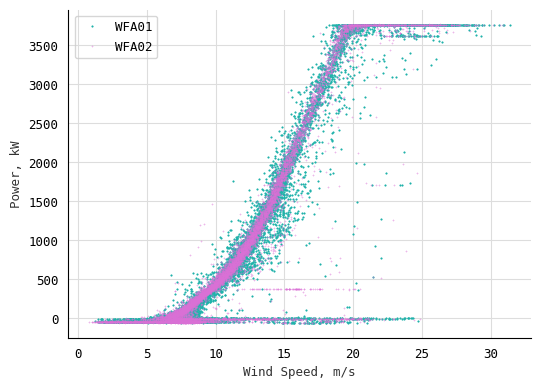

In [18]:
plt.plot(data["windfarm"]["WFA01"]["mean_WF_A01_windspeed"],
         data["windfarm"]["WFA01"]["mean_WF_A01_power"],
         ls="", marker=".")
plt.plot(data["windfarm"]["WFA02"]["mean_WF_A02_windspeed"],
         data["windfarm"]["WFA02"]["mean_WF_A02_power"],
         ls="", marker="+", alpha=0.5)
plt.xlabel("Wind Speed, m/s")
plt.ylabel("Power, kW")
plt.legend(["WFA01", "WFA02"])
plt.show();


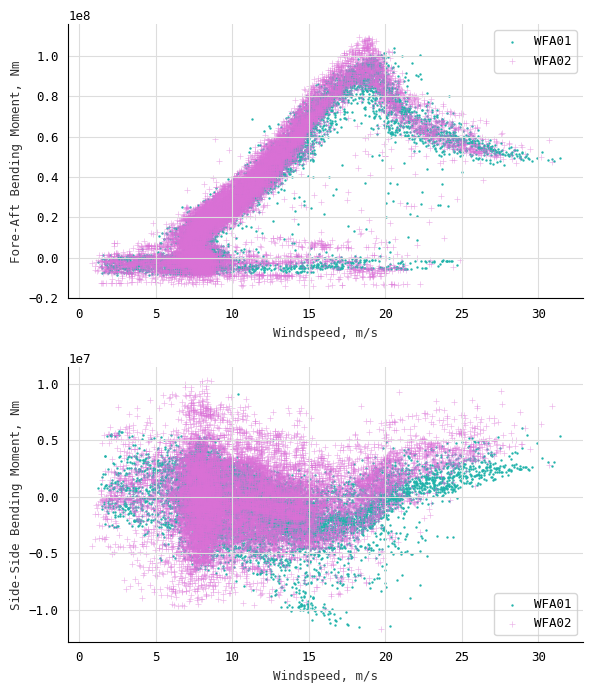

In [19]:
# Plot 10-minute average Bending Moments against the wind speed
fig, axs = plt.subplots(2, 1, figsize=(6, 7))

ax = df.plot("mean_WF_A01_windspeed", "mean_WF_A01_TP_SG_LAT010_Mtn",
             ax=axs[0], kind="scatter", color="lightseagreen", marker=".", s=2,
             label="WFA01")
df.plot("mean_WF_A02_windspeed", "mean_WF_A02_TP_SG_LAT010_Mtn", kind="scatter",
        ax=ax, marker="+", color="orchid", alpha=0.5,
        label="WFA02")

ax.set_xlabel("Windspeed, m/s")
ax.set_ylabel("Fore-Aft Bending Moment, Nm")

ax2 = df.plot("mean_WF_A01_windspeed", "mean_WF_A01_TP_SG_LAT010_Mtl",
              ax=axs[1], kind="scatter", color="lightseagreen", marker=".", s=2,
              label="WFA01")
df.plot("mean_WF_A02_windspeed", "mean_WF_A02_TP_SG_LAT010_Mtl", kind="scatter",
        ax=ax2, marker="+", color="orchid", alpha=0.5,
        label="WFA02")

ax2.set_xlabel("Windspeed, m/s")
ax2.set_ylabel("Side-Side Bending Moment, Nm")

plt.tight_layout();

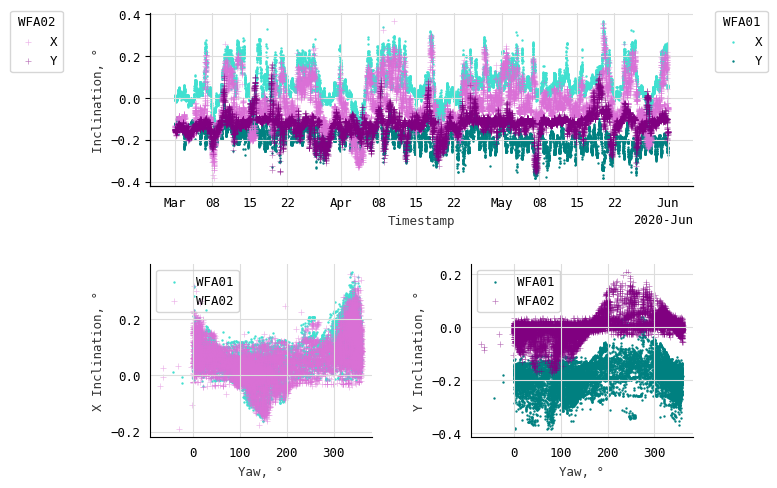

In [20]:
fig = plt.figure(figsize=(7, 5.5))

gs = fig.add_gridspec(12, 12)
ax1 = fig.add_subplot(gs[0:5, :])
ax2 = fig.add_subplot(gs[7:, 0:5])
ax3 = fig.add_subplot(gs[7:, 7:])

# mean_WF_A01_yaw
ax_1 = df.plot("timestamp", "mean_WF_A01_TP_INC_LAT015_DEG240_X_nr1",
               kind="scatter", color="turquoise", marker=".", label="X", s=2,
               ax=ax1)
df.plot("timestamp", "mean_WF_A01_TP_INC_LAT015_DEG240_Y_nr2",
        kind="scatter", color="teal", marker=".", ax=ax_1, s=2,
        label="Y")

ax1_1 = ax_1.twinx()
ax1_1.get_yaxis().set_visible(False)
df.plot("timestamp", "mean_WF_A02_TP_INC_LAT015_DEG240_X_nr1",
        kind="scatter", color="orchid", marker="+", ax=ax1_1, alpha=0.5,
        label="X")
df.plot("timestamp", "mean_WF_A02_TP_INC_LAT015_DEG240_Y_nr2",
        kind="scatter", color="purple", marker="+", ax=ax1_1, alpha=0.5,
        label="Y")
ax_1.legend(title="WFA01", bbox_to_anchor=(1.15, 1.05))
ax1_1.legend(title="WFA02", bbox_to_anchor=(-0.15, 1.05))

locator = mdates.AutoDateLocator(minticks=20, maxticks=26)
formatter = mdates.ConciseDateFormatter(locator)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)
ax1.set_xlabel("Timestamp")
ax1.set_ylabel("Inclination, °")

df.plot("mean_WF_A01_yaw", "mean_WF_A01_TP_INC_LAT015_DEG240_X_nr1",
        kind="scatter", color="turquoise", marker=".", ax=ax2, s=2,
        label= "WFA01")
df.plot("mean_WF_A02_yaw", "mean_WF_A02_TP_INC_LAT015_DEG240_X_nr1",
        kind="scatter", color="orchid", marker="+", ax=ax2, alpha=0.5,
        label="WFA02")
ax2.legend(loc="upper left")
ax2.set_xlabel("Yaw, °")
ax2.set_ylabel("X Inclination, °")

df.plot("mean_WF_A01_yaw", "mean_WF_A01_TP_INC_LAT015_DEG240_Y_nr2",
        kind="scatter", color="teal", marker=".", ax=ax3, s=2,
        label="WFA01")
df.plot("mean_WF_A02_yaw", "mean_WF_A02_TP_INC_LAT015_DEG240_Y_nr2",
        kind="scatter", color="purple", marker="+", ax=ax3, alpha=0.5,
        label="WFA02")
ax3.legend(loc="upper left")
ax3.set_xlabel("Yaw, °")
ax3.set_ylabel("Y Inclination, °")

plt.show();

# Convert to base64 and copy to clipboard
import io
import base64
s = io.BytesIO()
fig.savefig(s, format='png', bbox_inches="tight")
s = base64.b64encode(s.getvalue()).decode("utf-8").replace("\n", "")
img = f'''
<img alt="DEM V Windspeed Image"
  style="margin-left:auto;margin-right:auto;display:block;width:75%;"
  src="data:image/png;base64,{s}">
''';
# img is a base63-encoded string representation of the plot figure
# and it can be directly embedded within an html document as is, i.e.:
# <img alt="DEM V Windspeed Image"
#   style="margin-left:auto;margin-right:auto;display:block;width:75%;"
#   src="data:image/png;base64,ImageBase64EncodedImageStringGoesHere>


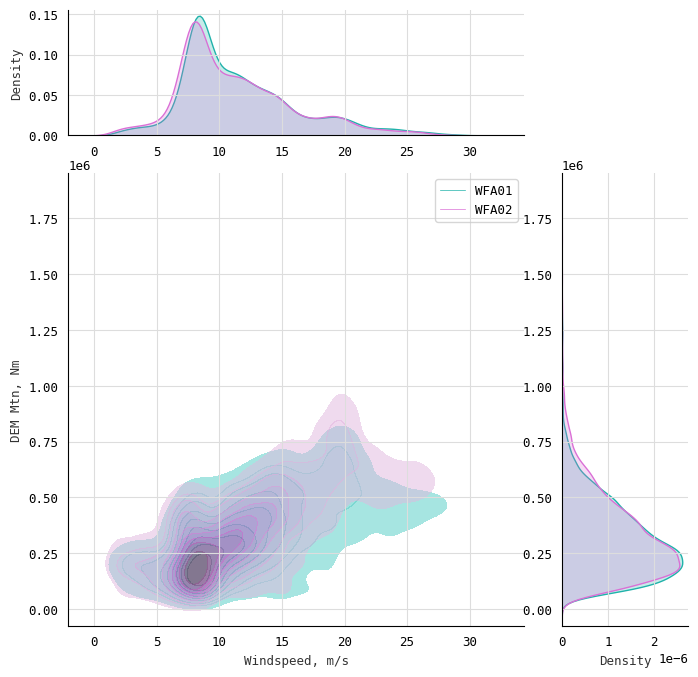

In [21]:

# Create a grid for the jointplot style layout
fig = plt.figure(figsize=(8, 8))

# Define the grid size and set up the axes
grid = plt.GridSpec(4, 4, hspace=0.3, wspace=0.3)

# Main plot (2D KDE)
main_ax = fig.add_subplot(grid[1:4, 0:3])

# Marginal KDE plots
x_hist = fig.add_subplot(grid[0, 0:3], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:4, 3], sharey=main_ax)

# Plot the first dataset (WFA01)
sns.kdeplot(data=df, x="mean_WF_A01_windspeed", y="DEM_WF_A01_TP_SG_LAT010_Mtn",
            ax=main_ax, color="lightseagreen", alpha=0.6, fill=True,
            label="WFA01")

sns.kdeplot(data=df, x="mean_WF_A01_windspeed", ax=x_hist,
            color="lightseagreen", fill=True)
sns.kdeplot(data=df, y="DEM_WF_A01_TP_SG_LAT010_Mtn", ax=y_hist,
            color="lightseagreen", fill=True)

# Plot the second dataset (WFA02)
sns.kdeplot(data=df, x="mean_WF_A02_windspeed", y="DEM_WF_A02_TP_SG_LAT010_Mtn",
            ax=main_ax, color="orchid", alpha=0.5, fill=True,
            label="WFA02")

sns.kdeplot(data=df, x="mean_WF_A02_windspeed", ax=x_hist, color="orchid",
            fill=True)
sns.kdeplot(data=df, y="DEM_WF_A02_TP_SG_LAT010_Mtn", ax=y_hist, color="orchid",
            fill=True)

# Hide the labels on the marginal plots
x_hist.set_xlabel("")
y_hist.set_ylabel("")

# Manually create legend handles
green_patch = plt.Line2D([], [], color="lightseagreen", label="WFA01")
purple_patch = plt.Line2D([], [], color="orchid", label="WFA02")

# Add the legend to the main plot
main_ax.legend(handles=[green_patch, purple_patch])

main_ax.set_xlabel("Windspeed, m/s")
main_ax.set_ylabel("DEM Mtn, Nm")
# Display the plot
plt.show();


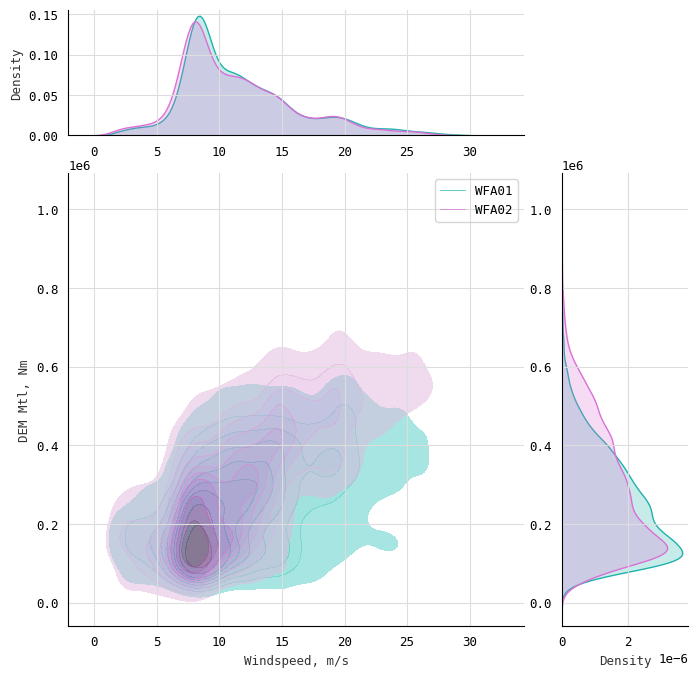

In [22]:

# Create a grid for the jointplot style layout
fig = plt.figure(figsize=(8, 8))

# Define the grid size and set up the axes
grid = plt.GridSpec(4, 4, hspace=0.3, wspace=0.3)

# Main plot (2D KDE)
main_ax = fig.add_subplot(grid[1:4, 0:3])

# Marginal KDE plots
x_hist = fig.add_subplot(grid[0, 0:3], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:4, 3], sharey=main_ax)

# Plot the first dataset (WFA01)
sns.kdeplot(data=df, x="mean_WF_A01_windspeed", y="DEM_WF_A01_TP_SG_LAT010_Mtl",
            ax=main_ax, color="lightseagreen", alpha=0.6, fill=True,
            label="WFA01")

sns.kdeplot(data=df, x="mean_WF_A01_windspeed", ax=x_hist,
            color="lightseagreen", fill=True)
sns.kdeplot(data=df, y="DEM_WF_A01_TP_SG_LAT010_Mtl", ax=y_hist,
            color="lightseagreen", fill=True)

# Plot the second dataset (WFA02)
sns.kdeplot(data=df, x="mean_WF_A02_windspeed", y="DEM_WF_A02_TP_SG_LAT010_Mtl",
            ax=main_ax, color="orchid", alpha=0.5, fill=True,
            label="WFA02")

sns.kdeplot(data=df, x="mean_WF_A02_windspeed", ax=x_hist, color="orchid",
            fill=True)
sns.kdeplot(data=df, y="DEM_WF_A02_TP_SG_LAT010_Mtl", ax=y_hist, color="orchid",
            fill=True)

# Hide the labels on the marginal plots
x_hist.set_xlabel("")
y_hist.set_ylabel("")

# Manually create legend handles
green_patch = plt.Line2D([], [], color="lightseagreen", label="WFA01")
purple_patch = plt.Line2D([], [], color="orchid", label="WFA02")

# Add the legend to the main plot
main_ax.legend(handles=[green_patch, purple_patch])

main_ax.set_xlabel("Windspeed, m/s")
main_ax.set_ylabel("DEM Mtl, Nm")
# Display the plot
plt.show();
